In [3]:
import numpy as np
import pandas as pd

In [63]:
players = pd.read_csv("players_22.csv")

C:\Users\tania\AppData\Local\Temp\ipykernel_28504\2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [5]:
players.columns


Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [64]:
features = ['overall', 'potential', 'value_eur', 'wage_eur',
       'age']

In [65]:
players = players.dropna(subset=features)

In [66]:
data = players[features].copy()

#### Transformação dos dados para uma unica escala 

In [10]:
# tecnica de escalonamento minimo e maximo
data = (data - data.min()) / (data.max() - data.min() ) * 9 + 1

In [11]:
# veremos aqui que o numero minimo de cada coluna é 1 e o valor maximo é 10
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


#### Aleatorização dos Centroides 

In [14]:
# ally corre caada doluna e em cada coluna selecionamos um valor aleatorio x.sample e a transformamos em um float
centroide = data.apply(lambda x: float(x.sample()))

In [15]:
centroides

overall      3.543478
potential    4.326087
value_eur    1.042497
wage_eur     1.000000
age          5.000000
dtype: float64

In [19]:
def random_centroides(data, k):
    centroides = []

    for i in range(k):
       centroide = data.apply(lambda x: float(x.sample()))
       
        centroides.append(centroide)
    return pd.concat(centroides, axis=1)

In [20]:
centroides = random_centroides(data, 5)

In [21]:
centroides

,0,1,2,3,4
overall,4.521739,4.521739,4.913043,5.695652,2.956522
potential,4.717391,4.521739,6.086957,5.695652,3.739130
value_eur,1.021620,1.129485,1.010717,1.036698,1.045976
wage_eur,1.270386,1.553648,1.000000,1.424893,1.000000
age,1.666667,3.666667,5.000000,5.333333,4.000000


#### Encontrando distancias dos jogadores em relação ao centroide 

In [ ]:
np.sqrt(((data - centroides.iloc[:,0]) ** 2).sum(axis=1)) # distancia euclideana

In [30]:
#aplicandio em cada coluna 
distancia = centroides.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)) )

In [31]:
distancia

,0,1,2,3,4
0,12.594918,11.749850,11.089892,10.503580,13.172515
1,12.112322,11.359557,10.749014,10.221177,12.763907
2,11.440140,10.418433,9.562140,8.933617,11.833708
3,11.815620,11.214652,10.761372,10.273032,12.628055
4,13.114034,12.476861,12.127012,11.611549,13.834854
...,...,...,...,...,...
19234,4.903745,4.665674,6.289844,6.674270,3.076013
19235,3.960785,4.237031,5.840511,6.390982,2.905539
19236,4.466021,4.386018,6.005689,6.460998,2.838557
19237,3.877765,4.168721,5.738022,6.309604,2.859056


In [32]:
#encontrando o indice (coluna) da minima distancia em cada linha

distancia.idxmin(axis=1)



0        3
1        3
2        3
3        3
4        3
        ..
19234    4
19235    4
19236    4
19237    4
19238    4
Length: 19165, dtype: int64

In [37]:
def get_labels(data , centroides):

    distancia = centroides.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)) )
    return distancia.idxmin(axis=1)

In [38]:
labels = get_labels(data, centroides)

In [39]:
labels.value_counts()

3    6345
1    4152
0    3963
4    2854
2    1851
dtype: int64

 #### Encontrando os centrides otimos
 
Agora que temos os cluster de cada jogador a partir do geramento de centroides aleatorios, iremos recalcular os centroides com base nos jogadores de cada cluster 

In [41]:
# Calculando media geometrica pois estamos calculando a media em um espaco euclidiano
#  multiplicamos cada ponto do cluster e tiramos a e-nesima raiz com base no numero de pontos
#   np.exp(np.log(x).mean())
#    agora grupby (labels) agrupando por colunas (cluster)


def new_centroides(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T #T para transpor a matiz




#### Repetir as ultimas duas etapas ate os centroides pararem de mudar 

In [43]:
from sklearn.decomposition import PCA #trasformar os dados multi dimensoes em duas para visualização
import matplotlib.pyplot as plt #
from IPython.display import clear_output #

In [45]:
def plot_clusters(data, labels, centroides, interation):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data) #transormacao dos dados em 2 colunas/componentes
    centroides_2d = pca.transform(centroides.T) # .T é pq o modulo pca espera q os dados estejam de forma que as linhas sejam ponto de dados e nao os grupos?
    clear_output(wait=True)
    plt.title(f'Interetion {interation}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroides_2d[:,0], y=centroides_2d[:,1])
    plt.show()

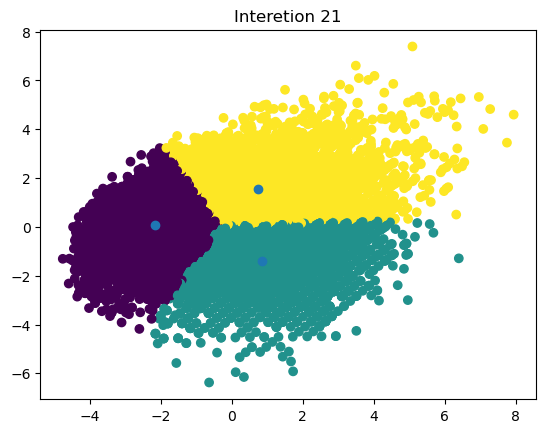

In [51]:
max_interation = 100 
k=3

centroides = random_centroides(data, k)
old_centroides = pd.DataFrame()
interation = 1

while interations < max_interation and not centroides.equals(old_centroides):
        
        old_centroides = centroides
        
        
        labels = get_labels(data, centroides)
        centroides = new_centroides(data, labels, k)
        plot_clusters(data, labels, centroides, interation)
        interation +=1

In [52]:
centroides

,0,1,2
overall,3.206838,4.784633,5.806043
potential,4.928473,4.506962,6.497993
value_eur,1.026614,1.044980,1.285501
wage_eur,1.028505,1.118904,1.420001
age,2.518708,5.472247,3.596161


In [56]:
players[labels ==2][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,1500000.0,3000.0,17
13256,L. Bate,63,83,1300000.0,5000.0,18
13351,Llabrés,63,81,1200000.0,3000.0,19
14144,H. Mejbri,62,84,1300000.0,6000.0,18


comparando com sklearn 

In [58]:
from sklearn.cluster import KMeans

In [67]:
Kmeans = KMeans(3)
Kmeans.fit(data)

C:\Users\tania\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
centroides = kmeans.cluster_centers_

In [ ]:
centroides

In [ ]:
pd.DataFrame(centroides, columns=features).T